In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
data = pd.read_csv('../data/preprocessing/crx.data', header=None)
data.columns = [f"A{s}" for s in range(1, data.shape[1] + 1)]
print(data.head)

<bound method NDFrame.head of     A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  00260    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  00200    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  00280  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g  00000    0   -

[690 rows x 16 columns]>


In [3]:
data = data.replace('?', np.nan)
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')
data['A16'] = data['A16'].map({'+':1, '-':0})
data.rename(columns={'A16':'target'}, inplace=True)

In [4]:
print(data.dtypes)

A1         object
A2        float64
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14       float64
A15         int64
target      int64
dtype: object


In [5]:
# introducing missing data at random places in four variables
random.seed(9001)
values = list(set([random.randint(0, len(data)) for p in range(0, 100)]))
data.loc[values, ['A3', 'A8', 'A9', 'A10']] = np.nan

In [6]:
data.to_csv('../data/preprocessing/credit_approval_uci.csv', index=False)

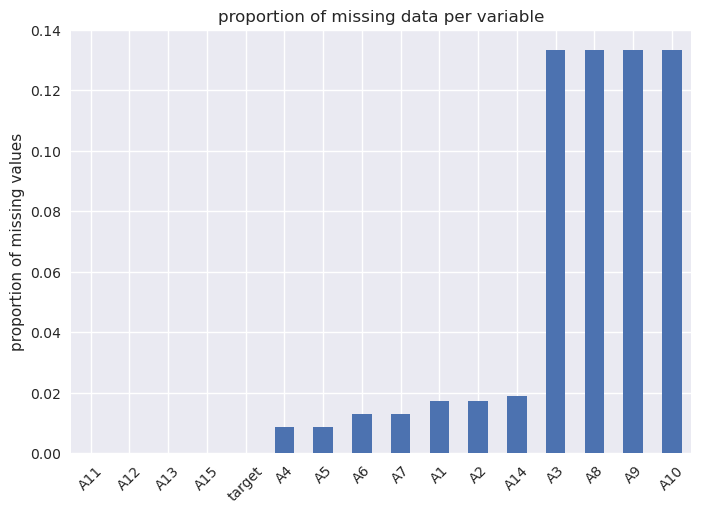

In [7]:
with plt.style.context('seaborn'):
    data.isna().mean().sort_values(ascending=True).plot.bar(rot=45)
    plt.ylabel('proportion of missing values')
    plt.title('proportion of missing data per variable')

In [8]:
data_cca = data.dropna()
print(f'the total number of observations: {len(data)}')
print(f'the total number of observations after removing missing data: {len(data_cca)}')

the total number of observations: 690
the total number of observations after removing missing data: 564


In [28]:
# custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

class DropMissingData(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X:pd.DataFrame):
        return self
    
    def transform(self, X:pd.DataFrame):
         return X.dropna()

In [29]:
obj = DropMissingData()
data_transformed = obj.fit_transform(data)
print(f'the total number of observations after removing missing data: {len(data_transformed)}')

the total number of observations after removing missing data: 564
